Name: Yilin Pu

Github Username: pyl32

USC ID: 2952467624

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import Normalizer

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

In [4]:
# conda install -c conda-forge imbalanced-learn

### 1. Tree-Based Methods
#### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a testset. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [38]:
data_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values = 'na')
data_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values = 'na')

In [6]:
data_train.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [39]:
data_test.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


#### (b) Data Preparation This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 1

##### i. Research what types of techniques are usually used for dealing with data with missing values.2 Pick at least one of them and apply it to this data in the next steps.3

In [47]:
train_X = data_train.drop(columns = 'class')
train_Y = data_train['class']
test_X = data_test.drop(columns = 'class')
test_Y = data_test['class']

In [48]:
data_train.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [10]:
## method1: use mean to replace missing value
mean = SimpleImputer(missing_values = np.nan) 
trans_imp =  mean.fit_transform(train_X)
train_imp = pd.DataFrame(trans_imp, columns = train_X.columns)

mean = SimpleImputer(missing_values = np.nan) 
trans_imp_test =  mean.fit_transform(test_X)
test_imp = pd.DataFrame(trans_imp_test, columns = test_X.columns)

print(train_imp, test_imp)

         aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...         ...       ...           ...            ...     ...     ...   
59995  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0     0.0    

In [11]:
## method2: using iterative imputation

imputers = IterativeImputer(estimator = BayesianRidge(), n_nearest_features=None)

train_imps = imputers.fit_transform(train_X)
test_imps = imputers.fit_transform(test_X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [12]:
train_imp2 = pd.DataFrame(train_imps, columns= train_X.columns)
test_imp2 = pd.DataFrame(test_imps, columns= test_X.columns)

print(train_imp2, test_imp2)

         aa_000     ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0   8.075984  2.130706e+09     280.000000     0.0     0.0   
1       33058.0 -26.770447  0.000000e+00  189942.495102     0.0     0.0   
2       41040.0   1.943195  2.280000e+02     100.000000     0.0     0.0   
3          12.0   0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  -3.918555  1.368000e+03     458.000000     0.0     0.0   
...         ...        ...           ...            ...     ...     ...   
59995  153002.0   2.059217  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0   0.772683  2.130707e+09     224.000000     0.0     0.0   
59997     112.0   0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  87.930062  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0   1.853869  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0

##### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [13]:
cv = train_imp.apply(lambda x: np.std(x)/np.mean(x)).sort_values(ascending=False)
cv

cs_009    235.275644
cf_000    184.231557
co_000    183.947485
ad_000    183.846088
dh_000    114.984033
             ...    
bo_000      0.462560
bp_000      0.425963
bq_000      0.399188
br_000      0.382666
cd_000      0.000000
Length: 170, dtype: float64

In [14]:
cv2 = train_imp2.apply(lambda x: np.std(x)/np.mean(x)).sort_values(ascending=False)
cv2

ab_000    14107.651698
db_000     5888.620828
ef_000     1679.511155
av_000      998.676058
dy_000      670.355090
              ...     
ar_000     -495.652401
ch_000     -570.898423
ea_000     -852.010412
ae_000    -1479.364055
af_000    -4099.690738
Length: 170, dtype: float64

In [15]:
normalize = Normalizer()
train_norm = normalize.fit_transform(train_imp)
train_norm = pd.DataFrame(train_norm, columns= train_imp.columns)
train_norm.head(10)

cv_norm = train_norm.apply(lambda x: np.std(x)/np.mean(x)).sort_values(ascending=False)
print(cv_norm)


normalize = Normalizer()
train_norm2 = normalize.fit_transform(train_imp2)
train_norm2 = pd.DataFrame(train_norm2, columns= train_imp2.columns)
train_norm2.head(10)

cv_norm2 = train_norm2.apply(lambda x: np.std(x)/np.mean(x)).sort_values(ascending=False)
print(cv_norm2)


cs_009    124.519958
dj_000    111.590077
ch_000     90.915622
ag_000     76.119597
ak_000     72.233389
             ...    
bx_000      0.995893
bb_000      0.966807
bu_000      0.966513
cq_000      0.966513
bv_000      0.966513
Length: 170, dtype: float64
as_000    1084.807740
ab_000     152.576657
dj_000     113.380240
au_000      94.238159
ch_000      77.932923
             ...     
ed_000       0.945957
da_000     -69.513799
cn_000    -110.732877
ag_000    -295.316917
cr_000    -399.436397
Length: 170, dtype: float64


##### iii. Plot a correlation matrix for your features using pandas or any other tool.

Text(0.5, 1.0, 'Correlation Heatmap of Normalized features')

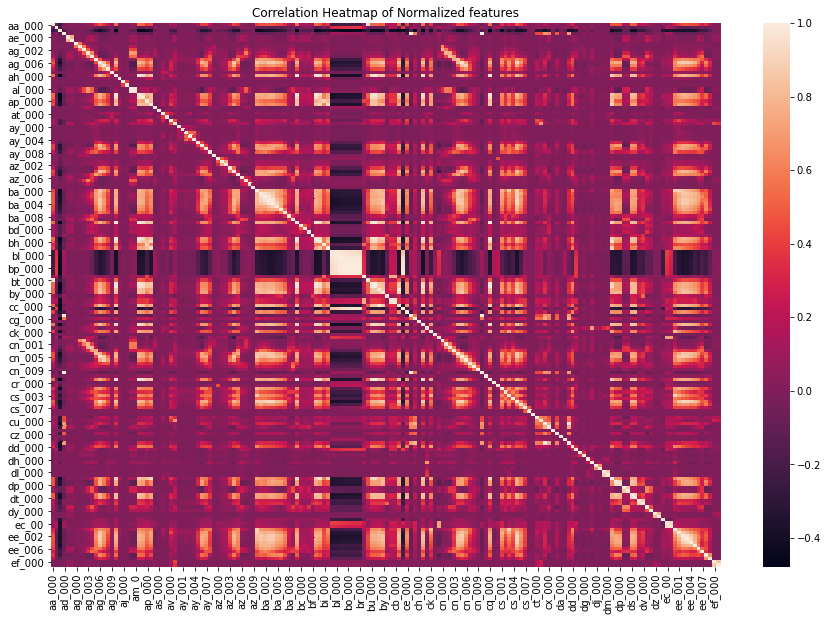

In [16]:
normalize = Normalizer()
test_norm = normalize.fit_transform(test_imp)
test_norm_imp = pd.DataFrame(test_norm, columns= test_imp.columns)
test_norm_imp

feat =  pd.concat([train_norm, test_norm_imp], ignore_index=True)
cor_X = feat.corr()
cor_X

plt.figure(figsize=(15, 10))
heatmap_norm = sns.heatmap(cor_X)
heatmap_norm .set_title('Correlation Heatmap of Normalized features')

##### iv. Pick [$\sqrt170$] features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

Index(['cs_009', 'dj_000', 'ch_000', 'ag_000', 'ak_000', 'ef_000', 'au_000',
       'as_000', 'az_009', 'dh_000', 'dz_000', 'df_000', 'eg_000'],
      dtype='object')
       cs_009  dj_000        ch_000  ag_000  ak_000    ef_000  au_000  as_000  \
0         0.0     0.0  0.000000e+00     0.0     0.0  0.000000     0.0     0.0   
1         0.0     0.0  3.437888e-11     0.0     0.0  0.000000     0.0     0.0   
2         0.0     0.0  0.000000e+00     0.0     0.0  0.000000     0.0     0.0   
3         0.0     0.0  0.000000e+00     0.0     0.0  0.000002     0.0     0.0   
4         0.0     0.0  0.000000e+00     0.0     0.0  0.000000     0.0     0.0   
...       ...     ...           ...     ...     ...       ...     ...     ...   
75995     0.0     0.0  0.000000e+00     0.0     0.0  0.000000     0.0     0.0   
75996     0.0     0.0  0.000000e+00     0.0     0.0  0.000000     0.0     0.0   
75997     0.0     0.0  0.000000e+00     0.0     0.0  0.000000     0.0     0.0   
75998     0.0     0.0  

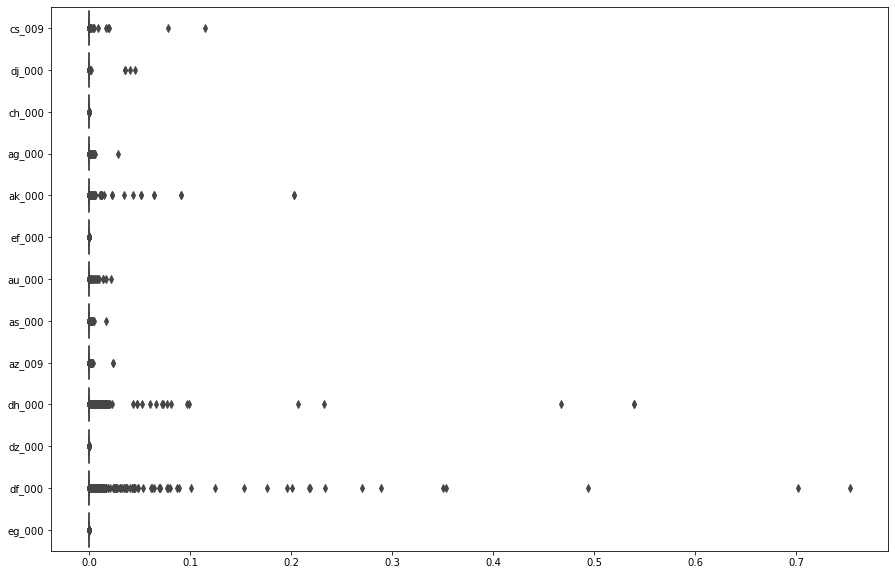

In [17]:
best_n = cv_norm.head(13).index
print(best_n)

best = pd.concat([feat.loc[:, best_n], train_Y], axis= 'columns')
print(best)


plt.figure(figsize=(15,10))
sns.boxplot(data=best, orient="h")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Defa

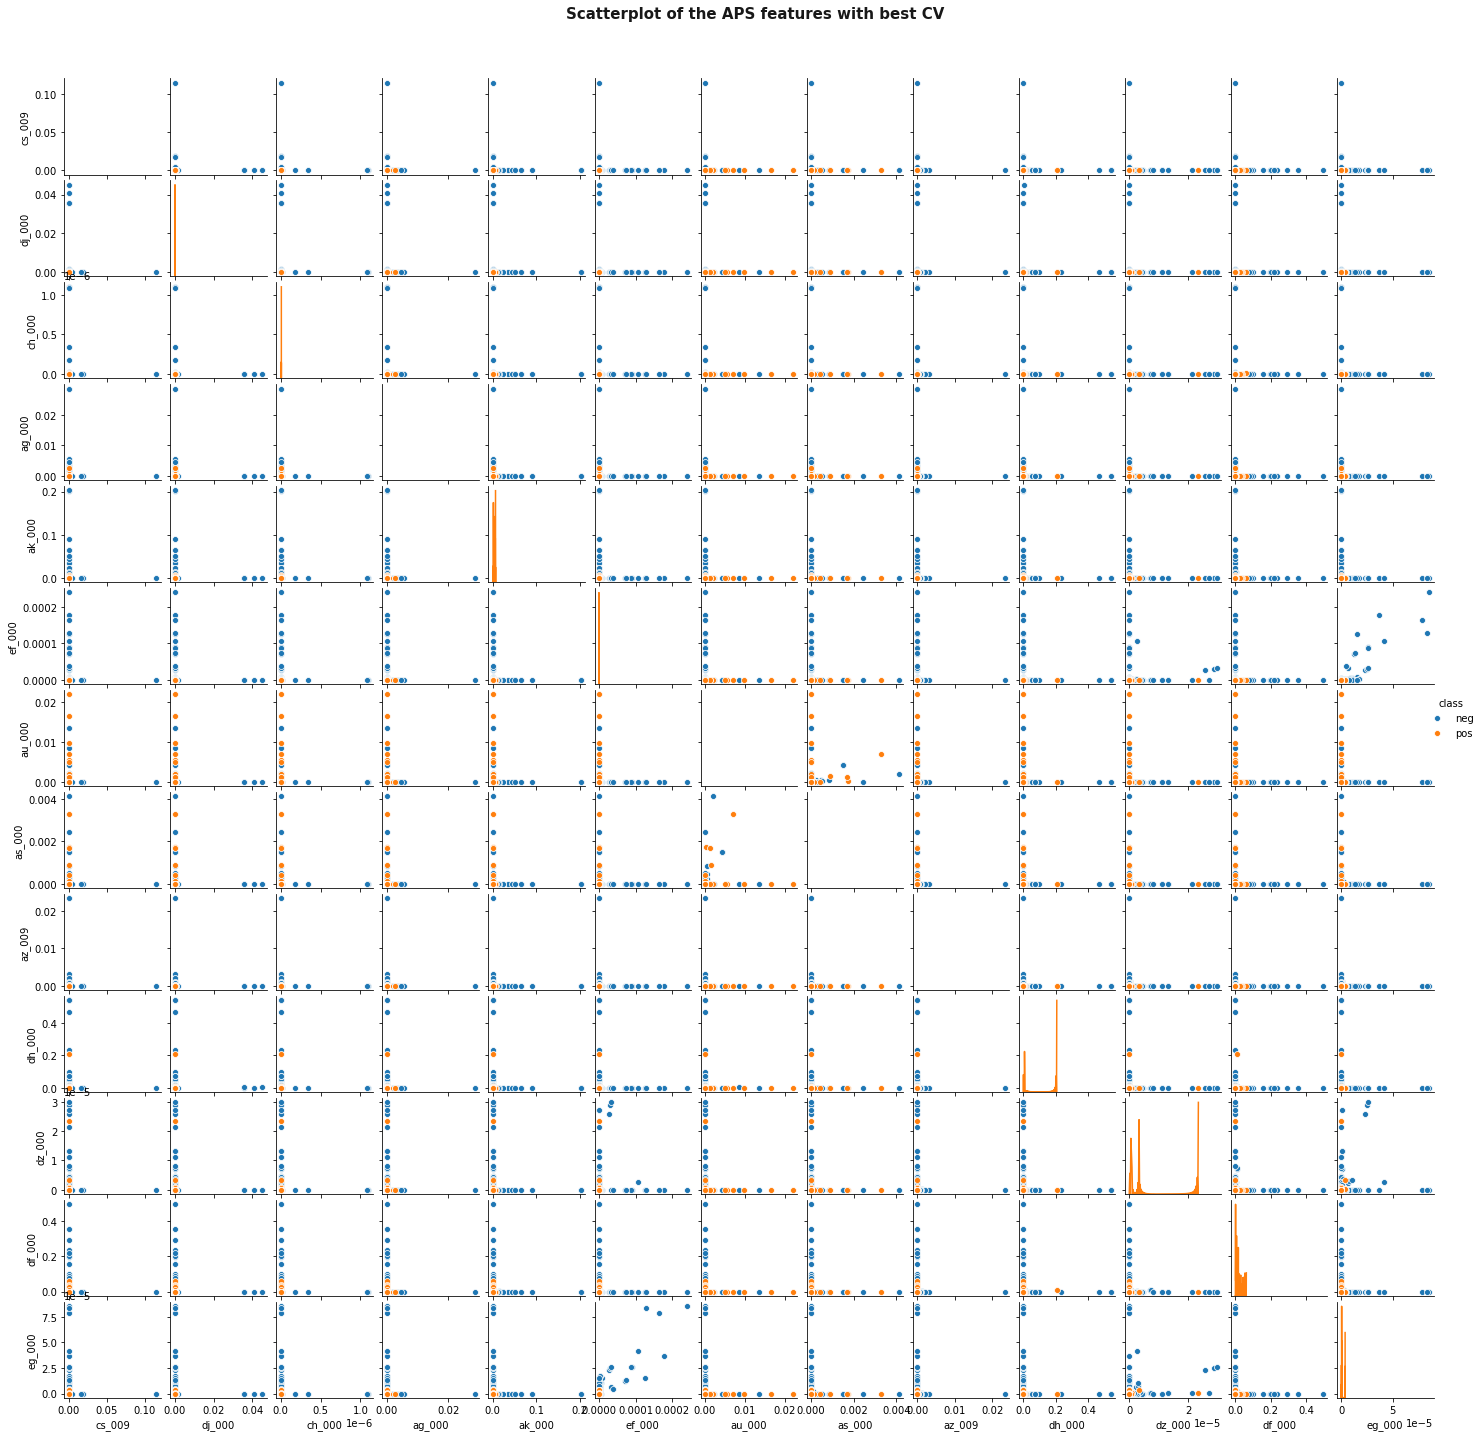

In [18]:
figure = sns.pairplot(best, diag_kind="kde",  hue="class")
figure.fig.set_size_inches(20,20)
plt.subplots_adjust(top = .93 )
figure.fig.suptitle("Scatterplot of the APS features with best CV  ", fontsize = 15, alpha = 0.9, weight = 'bold')
plt.show()

##### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [19]:
print("Positive and Negatives in Training data\n",train_Y.value_counts())
print("Positive and Negatives in Testing data\n",test_Y.value_counts())

Positive and Negatives in Training data
 neg    59000
pos     1000
Name: class, dtype: int64
Positive and Negatives in Testing data
 neg    15625
pos      375
Name: class, dtype: int64


From the results above, we can conclude it is difficult to mention the significance of these 13 features just by the scatter plots.

#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

Confusion matrix of training data:
 [[59000     0]
 [    1   999]]
The train error is:  1.666666666666483e-05
The accuracy of the training set 0.9999833333333333
The auc for training set is: 1.0


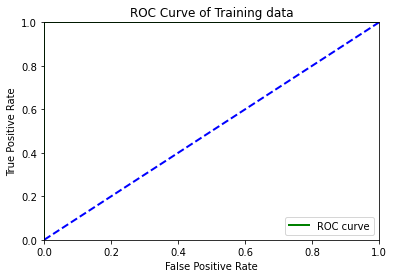

In [20]:
rf = RandomForestClassifier(n_estimators=100,  random_state=0, oob_score=True)
rf.fit(train_norm, train_Y)
pred_train = rf.predict(train_norm)
train_error = 1 - accuracy_score(train_Y, pred_train)
cm_rf = confusion_matrix(train_Y, pred_train)
print("Confusion matrix of training data:\n", cm_rf)
print("The train error is: ",train_error )
print("The accuracy of the training set", accuracy_score(train_Y, pred_train))


pred_train_p = rf.predict_proba(train_norm)

fpr, tpr, thresholds  = metrics.roc_curve(train_Y, pred_train_p[:,1], pos_label='pos')
roc_auc_train = metrics.auc(fpr, tpr)
print("The auc for training set is:",roc_auc_train)

plt.plot(fpr, tpr, color='green',lw = 2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Training data')
plt.legend(loc="lower right")
plt.show()

Confusion matrix of testing data:
 [[15610    15]
 [  132   243]]
The accuracy of the imbalanced testing data 0.9908125
The test error is:  0.009187500000000015
The auc for testing set is: 0.9919313920000001


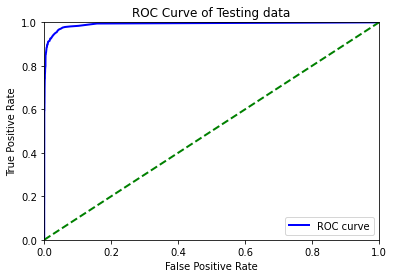

In [21]:
pred_test = rf.predict(test_norm) 
cm_rf_test = confusion_matrix(test_Y, pred_test)
print("Confusion matrix of testing data:\n", cm_rf_test)
print("The accuracy of the imbalanced testing data", accuracy_score(test_Y, pred_test))

test_error = 1 - accuracy_score(test_Y, pred_test)
print("The test error is: ",test_error)

pred_test_p = rf.predict_proba(test_norm)

fpr_t, tpr_t, thresholds  = metrics.roc_curve(test_Y, pred_test_p[:,1], pos_label='pos')
roc_auc_test = metrics.auc(fpr_t, tpr_t)
print("The auc for testing set is:",roc_auc_test)

plt.plot(fpr_t, tpr_t, color='blue',lw = 2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Testing data')
plt.legend(loc="lower right")
plt.show()

In [22]:
oob_score = 1 - rf.oob_score_
print("OOB score:", oob_score)
print("test error", test_error)

OOB score: 0.006833333333333358
test error 0.009187500000000015


From the results above,there is 1 misclassification out of 60000 in training data and 147 misclassification out of 16000 in testing data. The OOB error is lower than test error. Compareing to the training error, OOB is better to evaluate our model since the OOB error overfits and give very high accuracy.

#### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [23]:
rf_bal = RandomForestClassifier(n_estimators=100,class_weight="balanced",  random_state=0, oob_score=True)
rf_bal.fit(train_norm, train_Y)
pred_train = rf_bal.predict(train_norm)
train_error_b = 1 - accuracy_score(train_Y, pred_train)
cm_rf = confusion_matrix(train_Y, pred_train)
print("Confusion matrix of training data:\n", cm_rf)
print("The train error is: ",train_error_b )
print("The accuracy of the training set", accuracy_score(train_Y, pred_train))

pred_train_p = rf_bal.predict_proba(train_norm)

fpr, tpr, thresholds  = metrics.roc_curve(train_Y, pred_train_p[:,1], pos_label='pos')
roc_auc_train_b = metrics.auc(fpr, tpr)
print("The auc for training set is:",roc_auc_train_b)

Confusion matrix of training data:
 [[59000     0]
 [    0  1000]]
The train error is:  0.0
The accuracy of the training set 1.0
The auc for training set is: 1.0


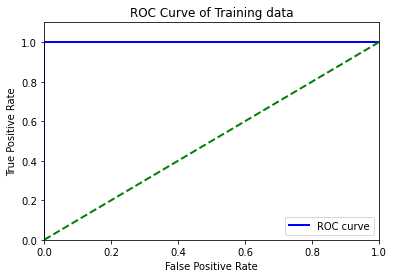

In [24]:
plt.plot(fpr, tpr, color='blue',lw = 2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Training data')
plt.legend(loc="lower right")
plt.show()

In [25]:
pred_test = rf_bal.predict(test_norm_imp) 

cm_rf_test_ = confusion_matrix(test_Y, pred_test)
print("Confusion matrix of testing data:\n", cm_rf_test_)
print("The accuracy of the balanced testing data", accuracy_score(test_Y, pred_test))

test_error_ = 1 - accuracy_score(test_Y, pred_test)
print("The test error is: ",test_error_ )


pred_test_p = rf.predict_proba(test_norm_imp)

fpr_t, tpr_t, thresholds  = metrics.roc_curve(test_Y, pred_test_p[:,1], pos_label='pos')
roc_auc_test_ = metrics.auc(fpr_t, tpr_t)
print("The auc for testing set is:",roc_auc_test_)

Confusion matrix of testing data:
 [[15614    11]
 [  178   197]]
The accuracy of the balanced testing data 0.9881875
The test error is:  0.011812500000000004
The auc for testing set is: 0.9919313920000001


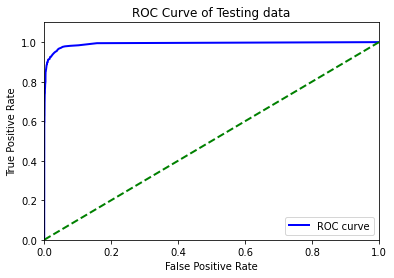

In [26]:
plt.plot(fpr_t, tpr_t, color='blue',lw = 2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Testing data')
plt.legend(loc="lower right")
plt.show()

In [27]:
oob_score_ = 1 - rf_bal.oob_score_
print("OOB score:", oob_score_)
print("test error", test_error_)

OOB score: 0.008016666666666672
test error 0.011812500000000004


There is 0 misclassification out of 60000 training data, and 189 misclassification out of 16000 testing data.

From the results above, we can see the accuracy of unbalanced data is 0.99, which is more than the accuracy of the unbalance compensated model 0.988.

#### (e) XGBoost and Model Trees In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general.In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule.....

In [56]:
newtrain_Y = train_Y.replace({'neg': 0, 'pos': 1})
newtest_Y = test_Y.replace({'neg': 0, 'pos': 1})

In [57]:
dtrain = xgb.DMatrix(train_X, label = newtrain_Y)
dtest = xgb.DMatrix(train_X)

param = {'booster':'gblinear','objective': 'reg:logistic','eval_metric': 'auc','silent':1}
num = 10
xgbm = xgb.train(param, dtrain, num)

pred = xgbm.predict(dtest)

In [ ]:
best_mse = 1
best_a = -1

As = [10 ** i for i in range(-5, 6)]

for a in As:
    model = xgb.XGBClassifier(objective = "binary:logistic", reg_alpha = a, verbosity = 0, use_label_encoder=False)
    scores = cross_val_score(model, train_X, newtrain_Y, scoring = "neg_mean_squared_error", cv = 5)
    mse = -sum(scores)/5
    if mse < best_mse:
        best_mse = mse
        best_a = a

In [61]:
print("Best score of training data with 5 fold:\n", best_mse)
print("Alpha of the training data with 5 fold:\n",best_a)

model = xgb.XGBClassifier(objective = "binary:logistic", reg_alpha = best_a, verbosity = 0, use_label_encoder=False)
model.fit(train_X, newtrain_Y)

pred_X = model.predict(train_X)
cm_tr = confusion_matrix(newtrain_Y,pred)
print('The confusion matrix of training set:\n', cm_tr)

Best score of training data with 5 fold:
 1
Alpha of the training data with 5 fold:
 0


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
cm_rf_test_new = confusion_matrix(newtest_Y, pred_test_Y)
print("Confusion matrix of testing data:\n", cm_rf_test_new)

print("The accuracy of the balanced training data", accuracy_score(newtest_Y, pred_test_Y))
test_error_w = 1 - accuracy_score(newtest_Y, pred_test_Y)
print("The train error is: ",test_error_)

fpr_w, tpr_w, thresholds  = metrics.roc_curve(newtest_Y, pred_test_p[:,1], pos_label='pos')
roc_auc_test_ = metrics.auc(fpr_w, tpr_w)
print("The auc for training set is:",roc_auc_test_)

In [ ]:
plt.plot(fpr_t, tpr_t, color='blue',lw = 2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of testing data using weka LMT ')
plt.legend(loc="lower right")
plt.show()

#### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

### 2. ISLR 6.6.3

Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer

(a) As we increase s from 0, the training RSS will:

Steadily decrease.
When s increases,the model is becoming more flexible because βj coefficients has less restriction.

(b) Repeat (a) for test RSS:

Decrease initially, and then eventually start increasing in a U shape.
As s increases, the flexibility of the model will increase. The test RSS will decrease, up to the point where it will begin to overfit

(c) Repeat (a) for variance:

Steadily increase.
The model flexibility is increasing so variance become larger.

(d) Repeat (a) for squared bias:

Steadily decrease.
The increase of the model flexibility decrease the bias.

(e) Repeat (a) for the irreducible error:
Remain constant.
The irreducible error is independent and remains constant regardless of model flexibility.

### 3. ISLR, 6.6.5

It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: βˆ0 = 0.

(a) Write out the ridge regression optimization problem in this setting

(b) Argue that in this setting, the ridge coefficient estimates satisfy βˆ1 = βˆ2.

(c) Write out the lasso optimization problem in this setting.

(d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions

#### see jpg in data file

### 4. ISLR 8.4.5

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P (Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

The number of red samples equal to 6 and the number of green samples equal to 4. So the majority vote approach is red. 

prob(Red|x) = (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45, so the classifying based on the average probability method is green.

### 5. ISLR 9.7.3

Here we explore the maximal margin classifier on a toy data set

#### see jpg in data file

### Reference

https://stackoverflow.com/questions/55846680/can-not-import-iterativeimputer-from-sklearn-impute

